**Meta hevristični pristop**



In [2]:
def metricna_dimenzija(G):
    n = G.num_verts()
    razdalje = G.distance_all_pairs()

    p = MixedIntegerLinearProgram(maximization = False)
    x = p.new_variable(binary = True)
    p.set_objective(sum(x[i] for i in G))
    for u, v in Combinations(G, 2):
        p.add_constraint(sum(x[i] for i in G if razdalje[u].get(i, n) != razdalje[v].get(i, n)) >= 1)

    p.solve()
    razlocujoca_mnozica = [i for i in G if round(p.get_values(x[i])) == 1]

    return len(razlocujoca_mnozica)

In [3]:
def na_napake_odporna_metricna_dimenzija(G):
    n = G.num_verts() # izračunam število vozlišč grafa G
    razdalje = G.distance_all_pairs() # matrika razdalj med vsakim parom vozlišč iz G

    # inicializacija CLP:
    p = MixedIntegerLinearProgram(maximization = False) # minimizacija
    x = p.new_variable(binary = True) # ustvarjanje binarne spremenljivke za uporabo znotraj CLP p
    p.set_objective(sum(x[i] for i in G))
    # pogoj: vsak par (u, v) ima vsaj dve razločujoči vozlišči v S:
    for u, v in Combinations(G, 2):
        p.add_constraint(sum(x[i] for i in G if razdalje[u].get(i, n) != razdalje[v].get(i, n)) >= 2)

    # reševanje CLP:
    p.solve()
    na_napake_odporna_razlocujoca_mnozica = [i for i in G if round(p.get_values(x[i])) == 1]

    # vrnemo kardinalnost = moč razločujoče množice:
    return len(na_napake_odporna_razlocujoca_mnozica)

Pri meta hevrističnem pristopu, potrebujemo še kodo, ki bo začetnemu grafu dodala oziroma odvzela neko povezavo. S tem bomo graf nekoliko spremenili.


In [4]:
from sage.all import *
import random
import matplotlib.pyplot as plt

# funkcija za spremembo grafa

def tweak_graf(G):
    povezave = list(G.edges(labels=False))
    if random.random() < 0.5 and povezave:
        # Izbrišemo naključno povezavo
        G.delete_edge(random.choice(povezave))
    else:
        # Dodao naključno povezavo
        u, v = random.sample(range(G.num_verts()), 2)
        if not G.has_edge(u, v):
            G.add_edge(u, v)

In [5]:
def simulated_annealing(ciljna_dim, ciljna_ftdim, st_vozlisc, iteracije=1000, temperatura=100, ohlajanje=0.95):
    # Definiramo začetni graf
    trenuten_graf = graphs.CompleteGraph(st_vozlisc)
    
    trenutna_dim = metricna_dimenzija(trenuten_graf)
    trenuten_ftdim = na_napake_odporna_metricna_dimenzija(trenuten_graf)
    best_graf = trenuten_graf
    best_dim = trenutna_dim
    best_ftdim = trenuten_ftdim

    temp = temperatura

    for iteration in range(iteracije):
        if temp <= 0:
            break

        # Naredimo kopijo in spremenimo graf s tweak funkcijo
        nov_graf = trenuten_graf.copy()
        tweak_graf(nov_graf)

        nov_dim = metricna_dimenzija(nov_graf)
        nov_ftdim = na_napake_odporna_metricna_dimenzija(nov_graf)

        # Preverimo če dosega kriterije
        delta = abs(nov_dim - ciljna_dim) + abs(nov_ftdim - ciljna_ftdim) - abs(trenutna_dim - ciljna_dim) - abs(trenuten_ftdim - ciljna_ftdim)
        if delta < 0 or random.random() < exp(-delta / temp):
            trenuten_graf = nov_graf
            trenutna_dim = nov_dim
            trenuten_ftdim = nov_ftdim

            # Če dosega kriterije posodobimo graf
            if abs(nov_dim - ciljna_dim) + abs(nov_ftdim - ciljna_ftdim) < abs(best_dim - ciljna_dim) + abs(best_ftdim - ciljna_ftdim):
                best_graf = nov_graf
                best_dim = nov_dim
                best_ftdim = nov_ftdim
        temp *= ohlajanje

    best_graf.show()
    return best_graf, best_dim, best_ftdim

Funkcijo simulated\_annealing poženemo na različnih grafih, kjer spreminjamo tudi na napako odporno metrično dolžino.


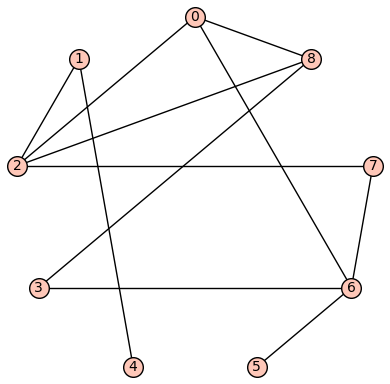

(Complete graph: Graph on 9 vertices, 2, 4)

In [6]:
simulated_annealing(2, 4, 9)

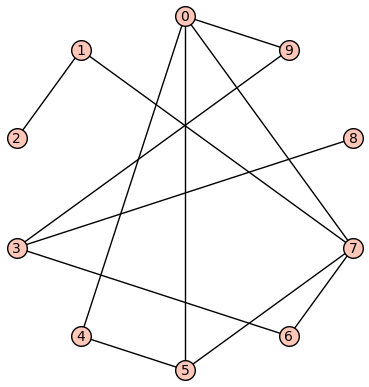

(Complete graph: Graph on 10 vertices, 2, 4)

In [7]:
simulated_annealing(2, 4, 10)

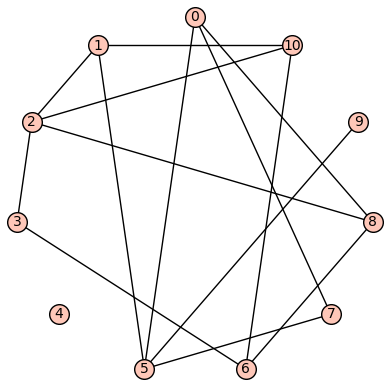

(Complete graph: Graph on 11 vertices, 2, 4)

In [8]:
simulated_annealing(2, 4, 11)

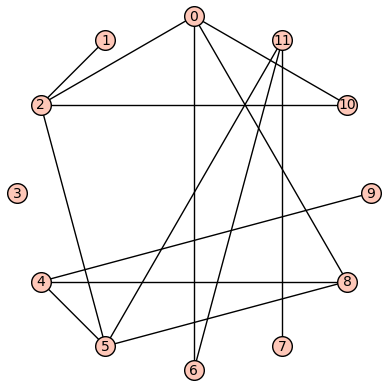

(Complete graph: Graph on 12 vertices, 2, 4)

In [9]:
simulated_annealing(2, 4, 12)

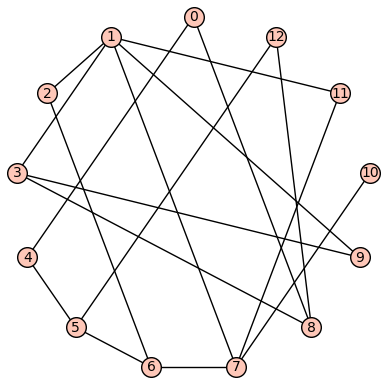

(Complete graph: Graph on 13 vertices, 2, 4)

In [10]:
simulated_annealing(2, 4, 13)

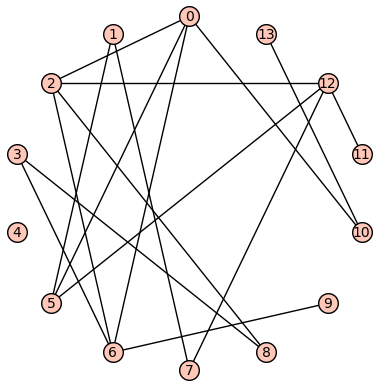

(Complete graph: Graph on 14 vertices, 2, 4)

In [11]:
simulated_annealing(2, 4, 14)

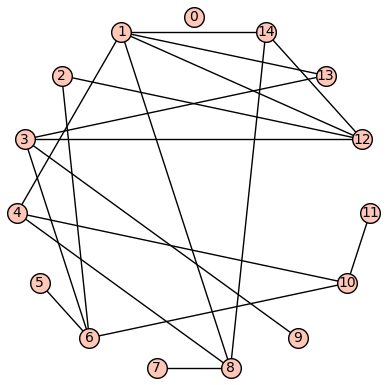

(Complete graph: Graph on 15 vertices, 2, 4)

In [12]:
simulated_annealing(2, 4, 15)

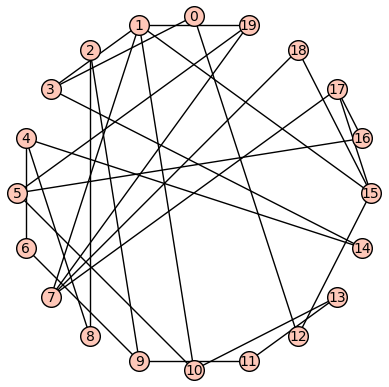

(Complete graph: Graph on 20 vertices, 2, 4)

In [13]:
simulated_annealing(2, 4, 20)

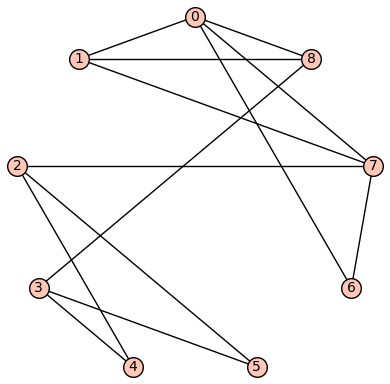

(Complete graph: Graph on 9 vertices, 2, 5)

In [14]:
simulated_annealing(2, 5, 9)

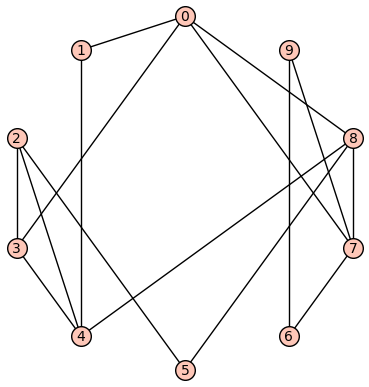

(Complete graph: Graph on 10 vertices, 2, 5)

In [15]:
simulated_annealing(2, 5, 10)

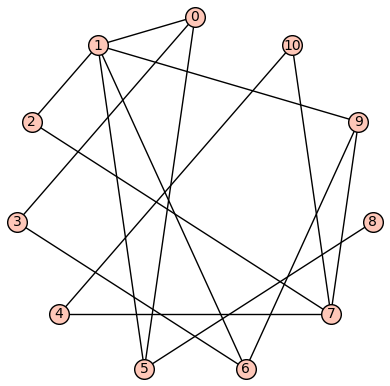

(Complete graph: Graph on 11 vertices, 2, 5)

In [16]:
simulated_annealing(2, 5, 11)

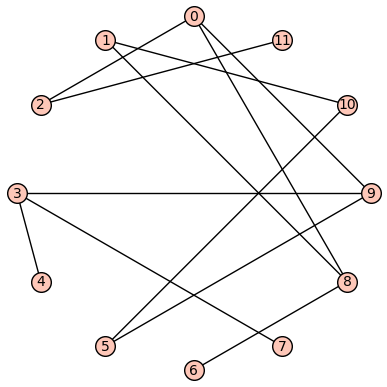

(Complete graph: Graph on 12 vertices, 2, 5)

In [17]:
simulated_annealing(2, 5, 12)

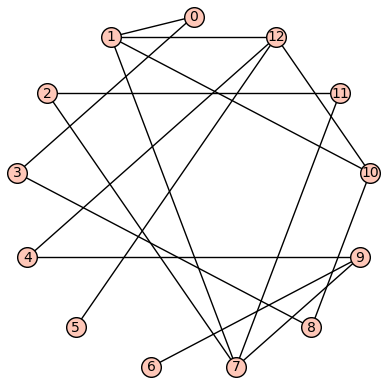

(Complete graph: Graph on 13 vertices, 2, 5)

In [18]:
simulated_annealing(2, 5, 13)

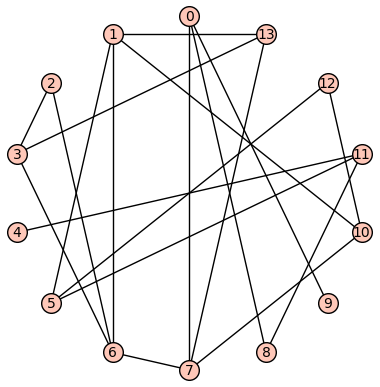

(Complete graph: Graph on 14 vertices, 2, 5)

In [19]:
simulated_annealing(2, 5, 14)

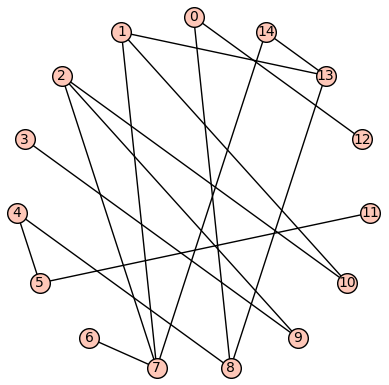

(Complete graph: Graph on 15 vertices, 2, 5)

In [20]:
simulated_annealing(2, 5, 15)

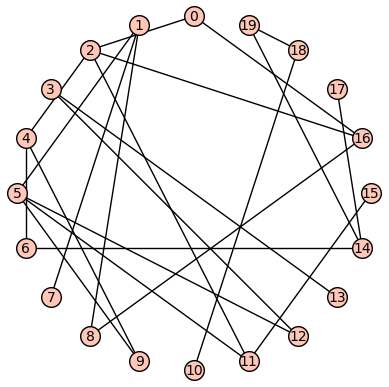

(Complete graph: Graph on 20 vertices, 2, 5)

In [21]:
simulated_annealing(2, 5, 20)

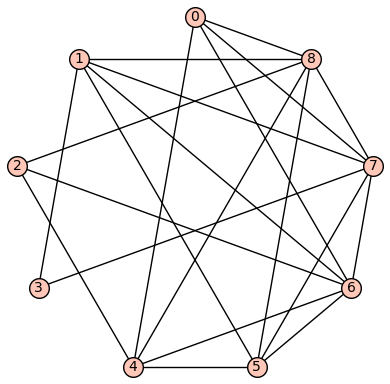

(Complete graph: Graph on 9 vertices, 3, 6)

In [22]:
simulated_annealing(2, 6, 9)

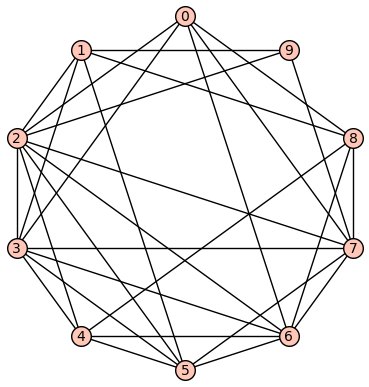

(Complete graph: Graph on 10 vertices, 3, 6)

In [23]:
simulated_annealing(2, 6, 10)

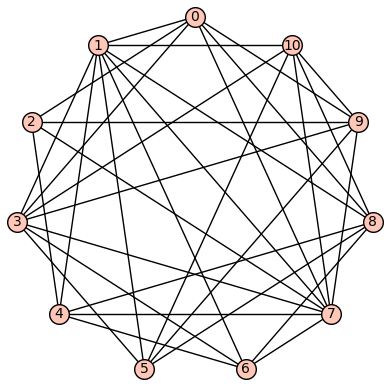

(Complete graph: Graph on 11 vertices, 3, 6)

In [24]:
simulated_annealing(2, 6, 11)

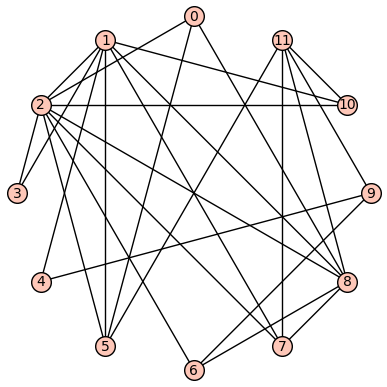

(Complete graph: Graph on 12 vertices, 3, 6)

In [25]:
simulated_annealing(2, 6, 12)

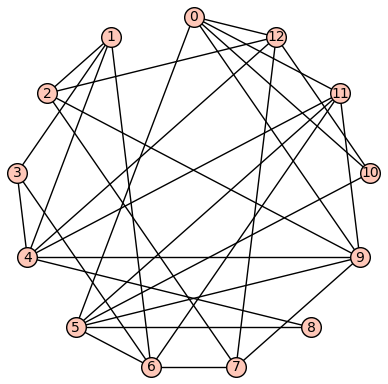

(Complete graph: Graph on 13 vertices, 3, 6)

In [26]:
simulated_annealing(2, 6, 13)

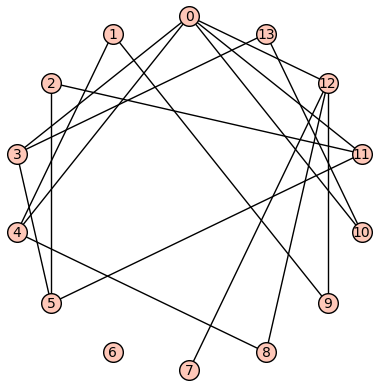

(Complete graph: Graph on 14 vertices, 2, 6)

In [27]:
simulated_annealing(2, 6, 14)

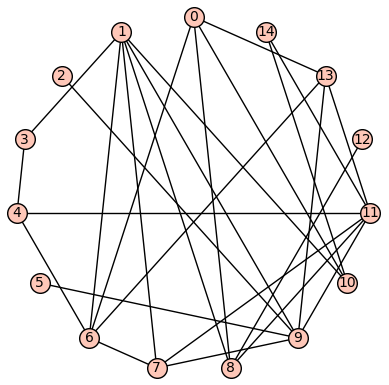

(Complete graph: Graph on 15 vertices, 3, 6)

In [28]:
simulated_annealing(2, 6, 15)

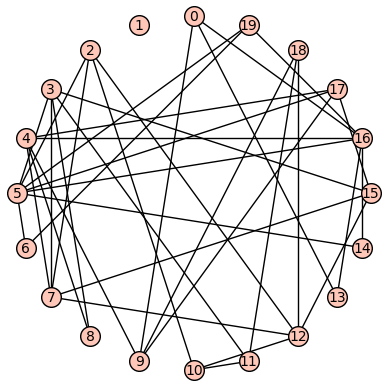

(Complete graph: Graph on 20 vertices, 3, 6)

In [29]:
simulated_annealing(2, 6, 20)

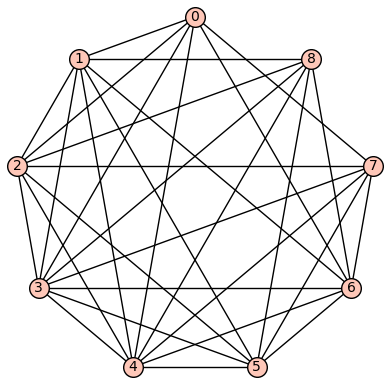

(Complete graph: Graph on 9 vertices, 4, 7)

In [30]:
simulated_annealing(2, 7, 9)

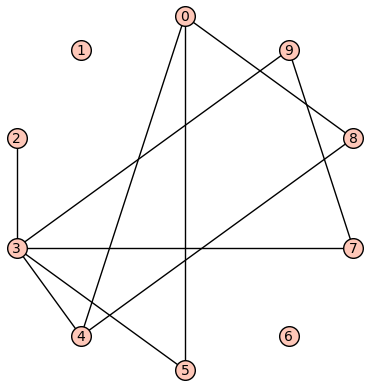

(Complete graph: Graph on 10 vertices, 3, 7)

In [31]:
simulated_annealing(2, 7, 10)

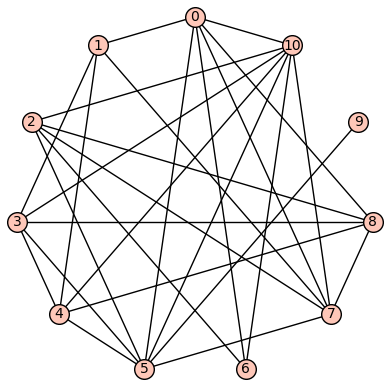

(Complete graph: Graph on 11 vertices, 3, 7)

In [32]:
simulated_annealing(2, 7, 11)

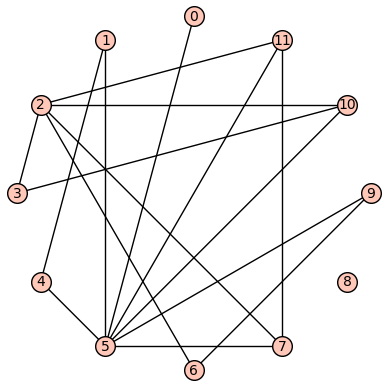

(Complete graph: Graph on 12 vertices, 3, 7)

In [33]:
simulated_annealing(2, 7, 12)

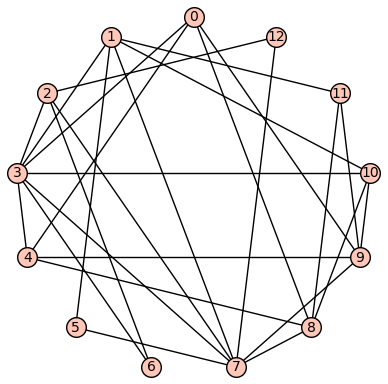

(Complete graph: Graph on 13 vertices, 3, 7)

In [34]:
simulated_annealing(2, 7, 13)

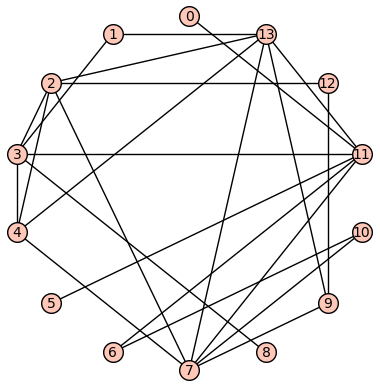

(Complete graph: Graph on 14 vertices, 3, 7)

In [35]:
simulated_annealing(2, 7, 14)

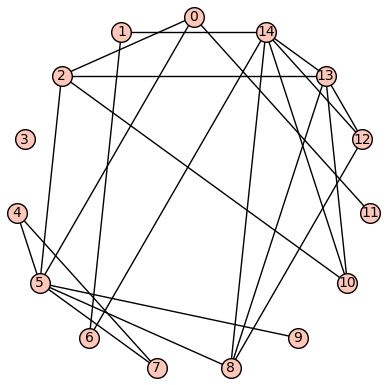

(Complete graph: Graph on 15 vertices, 3, 7)

In [36]:
simulated_annealing(2, 7, 15)

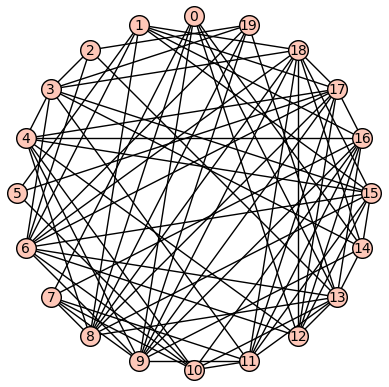

(Complete graph: Graph on 20 vertices, 4, 7)

In [37]:
simulated_annealing(2, 7, 20)

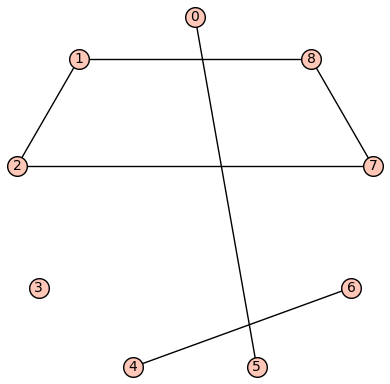

(Complete graph: Graph on 9 vertices, 4, 8)

In [38]:
simulated_annealing(2, 8, 9)

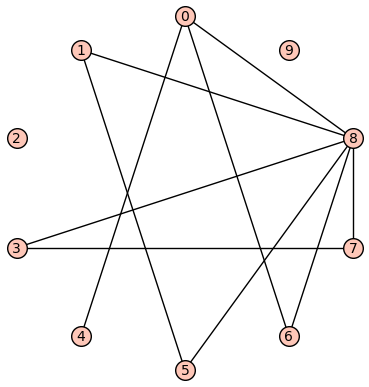

(Complete graph: Graph on 10 vertices, 4, 8)

In [39]:
simulated_annealing(2, 8, 10)

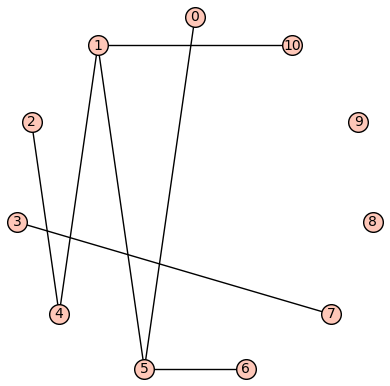

(Complete graph: Graph on 11 vertices, 4, 8)

In [40]:
simulated_annealing(2, 8, 11)

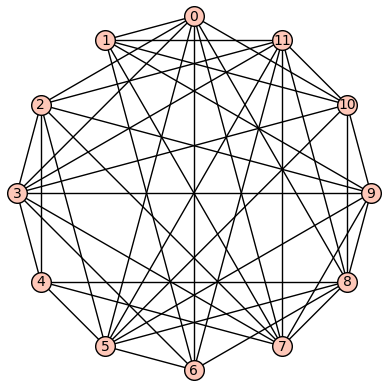

(Complete graph: Graph on 12 vertices, 4, 8)

In [41]:
simulated_annealing(2, 8, 12)

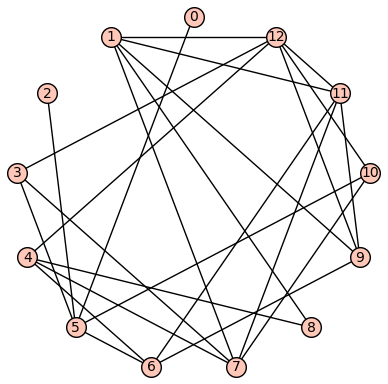

(Complete graph: Graph on 13 vertices, 3, 7)

In [42]:
simulated_annealing(2, 8, 13)

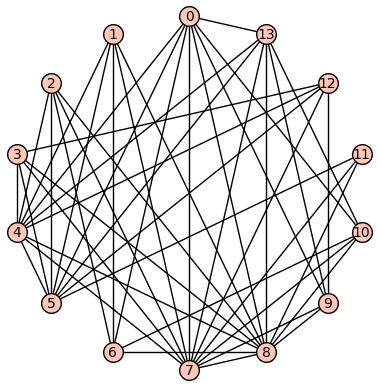

(Complete graph: Graph on 14 vertices, 4, 8)

In [43]:
simulated_annealing(2, 8, 14)

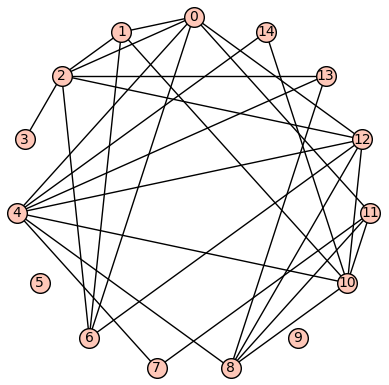

(Complete graph: Graph on 15 vertices, 4, 8)

In [44]:
simulated_annealing(2, 8, 15)

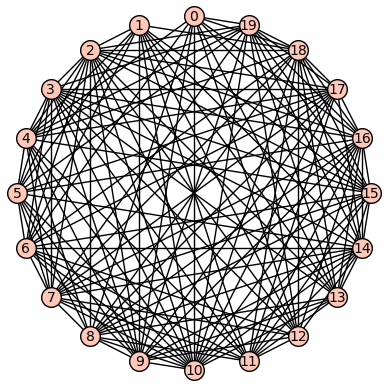

(Complete graph: Graph on 20 vertices, 5, 8)

In [45]:
simulated_annealing(2, 8, 20)